# Assignment 1

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 0. Importing Dataset

In [2]:
df = pd.read_csv("uber.csv")


In [3]:
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### 1. Pre-process the dataset.

In [5]:
df.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [11]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])


In [12]:
df.isna()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.dropna(inplace=True)


### 2. Identify outliers.


<Axes: xlabel='fare_amount'>

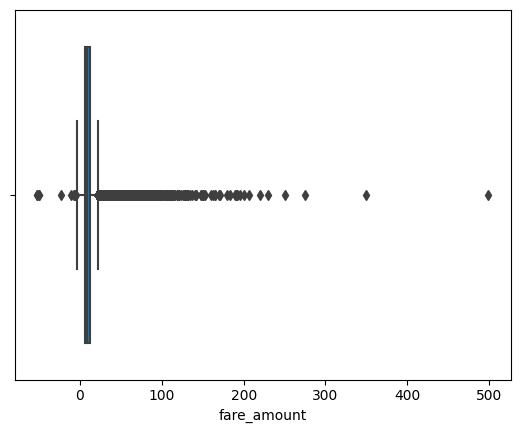

In [54]:
sns.boxplot(data=df, x="fare_amount")


In [36]:
q_low = df["fare_amount"].quantile(0.01)
q_hi = df["fare_amount"].quantile(0.99)

df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)].count()


Unnamed: 0           194911
key                  194911
fare_amount          194911
pickup_datetime      194911
pickup_longitude     194911
pickup_latitude      194911
dropoff_longitude    194911
dropoff_latitude     194911
passenger_count      194911
dtype: int64

In [55]:
df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]


In [61]:
df.size


1754199

<Axes: xlabel='fare_amount'>

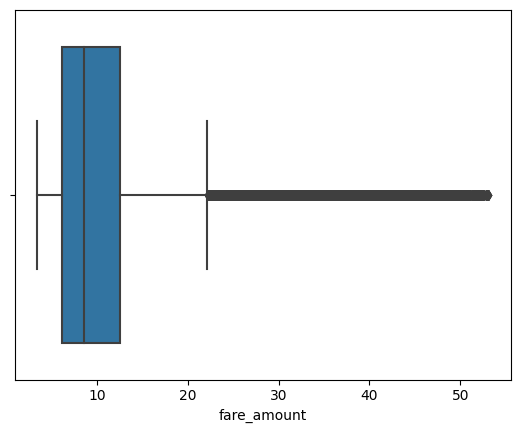

In [58]:
sns.boxplot(data=df, x="fare_amount")


In [65]:
df.drop('key', axis=1, inplace=True)


C:\Users\Akash Kalme\AppData\Local\Temp\ipykernel_15776\925874833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('key', axis=1, inplace=True)


### 3. Check the correlation.


In [67]:
correlation_matrix = df.corr()
correlation_matrix


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.000339,-0.001864,-0.000209,-0.000028,-0.000107,0.000647,0.002241
fare_amount,-0.000339,1.000000,0.098207,0.006534,-0.004843,0.006012,-0.007651,0.012145
pickup_datetime,-0.001864,0.098207,1.000000,0.008037,-0.008536,0.005789,-0.008432,0.005714
pickup_longitude,-0.000209,0.006534,0.008037,1.000000,-0.810943,0.832846,-0.846712,-0.000737
pickup_latitude,-0.000028,-0.004843,-0.008536,-0.810943,1.000000,-0.773097,0.697275,-0.001288
dropoff_longitude,-0.000107,0.006012,0.005789,0.832846,-0.773097,1.000000,-0.914509,-0.000020
dropoff_latitude,0.000647,-0.007651,-0.008432,-0.846712,0.697275,-0.914509,1.000000,-0.000537
passenger_count,0.002241,0.012145,0.005714,-0.000737,-0.001288,-0.000020,-0.000537,1.000000


<Axes: >

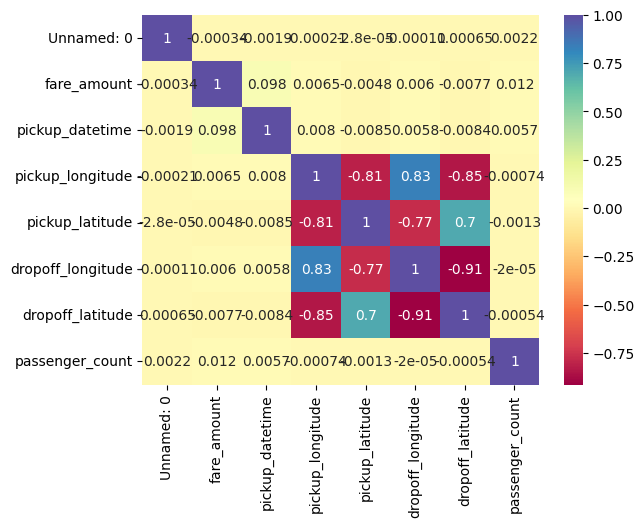

In [74]:
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')


### 4. Implement linear regression and random forest regression models.

In [75]:
from sklearn.model_selection import train_test_split


In [76]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']


In [77]:
X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


In [79]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_preds_lm = lm.predict(X_test)


In [85]:
from sklearn.ensemble import RandomForestRegressor

rfm = RandomForestRegressor(n_estimators=100, random_state=42)
rfm.fit(X_train, y_train)

y_preds_rfm = rfm.predict(X_test)


### 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Metrics for Linear Regression Model: ")
lm_r2 = r2_score(y_preds_lm, y_test)
lm_mae = mean_absolute_error(y_preds_lm, y_test)
lm_rmse = mean_squared_error(y_preds_lm, y_test, squared=False)

print(f"\tR^2 Score (Co-efficient of Detemination): {lm_r2}")
print(f"\tMean Absolute Error: {lm_mae}")
print(f"\tRoot Mean Squared Error: {lm_rmse}")


Metrics for Linear Regression Model: 
	R^2 Score (Co-efficient of Detemination): -101.1161895473147
	Mean Absolute Error: 5.327838176284201
	Root Mean Squared Error: 8.026914370354785


In [86]:
print("Metrics for Linear Regression Model: ")
rfm_r2 = r2_score(y_preds_rfm, y_test)
rfm_mae = mean_absolute_error(y_preds_rfm, y_test)
rfm_rmse = mean_squared_error(y_preds_rfm, y_test, squared=False)

print(f"\tR^2 Score (Co-efficient of Detemination): {rfm_r2}")
print(f"\tMean Absolute Error: {rfm_mae}")
print(f"\tRoot Mean Squared Error: {rfm_rmse}")


Metrics for Linear Regression Model: 
	R^2 Score (Co-efficient of Detemination): 0.7769967740082664
	Mean Absolute Error: 1.84682630633866
	Root Mean Squared Error: 3.4650297073526835
